## 4-5. 워드클라우드 만들기 - 해시코드 질문 키워드

- bs4와 wordcloud를 이용해서 질문 키워드를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 제목의 키워드

지난 실습에서 해시코드(https://hashcode.co.kr) 질문태그를 활용해 Bar Plot을 그렸다면,   
이번 실습에서는 질문 제목을 스크래핑한 후, 형태소 분석을 진행해서 워드클라우드를 그려봅시다.

In [1]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [2]:
# Pagination이 되어있는 질문 리스트의 제목을 모두 가져와 리스트 questions에 저장해봅시다.
# https://hashcode.co.kr/?page={i}
# 과도한 요청을 방지하기 위해 0.5초마다 요청을 보내봅시다.

import requests
from bs4 import BeautifulSoup
import time

questions = []

for i in range(1, 6):
    res = requests.get(f"https://qna.programmers.co.kr/?page={i}", user_agent)
    time.sleep(3)
    soup = BeautifulSoup(res.text, "html.parser")
    parsed_data_list = soup.find_all("li", "question-list-item")
    for data in parsed_data_list:
        questions.append(data.h4.text.strip())

In [5]:
questions[:10]

['파이썬에서 동적 클래스와 정적 클래스의 차이점을 제대로 이해한지 궁금합니다.',
 'BI tool 과 Dashboard 솔루션의 차이',
 '틀린 부분 모르겠어요ㅠㅠ',
 'flask를 vscode에서 gunicorn을 활성화해서 실행시키고 싶은데 gunicorn을 활성화했는데도 wsgi  서버를 활용하지 않느다고 오류메세지가 뜨네요',
 'MSSQL 2008->2019 마이그레이션 후 게시판 정렬 문제',
 '묵시적 형변환',
 'y값이 입력이 안됩니다.',
 '이 방식으로 배포하는 게 맞나요?',
 '스택 자료 삭제 알고리즘 문제 관련 궁금한 점',
 '프로그램에 대하여']

In [6]:
# 텍스트 구름을 그리기 위해 필요한 라이브러리를 불러와봅시다.

# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

In [8]:
# Hannanum 객체를 생성한 후, .nouns()를 통해 명사를 추출합니다.

hannanum = Hannanum()

words = []
for q in questions:
    nouns = hannanum.nouns(q)
    words += nouns
    
print(len(words))

1064


In [9]:
# counter를 이용해 각 단어의 개수를 세줍니다.

from collections import Counter

counter = Counter(words)

In [10]:
counter.most_common(20)

[('질문', 51),
 ('파이썬', 42),
 ('문제', 25),
 ('오류', 18),
 ('수', 16),
 ('코드', 15),
 ('언어', 13),
 ('방법', 12),
 ('관련', 11),
 ('질문드', 11),
 ('저장', 11),
 ('자바', 10),
 ('출력', 9),
 ('때', 9),
 ('코딩테스트', 9),
 ('중', 8),
 ('발생', 8),
 ('프로그램', 7),
 ('코딩', 7),
 ('구현', 7)]

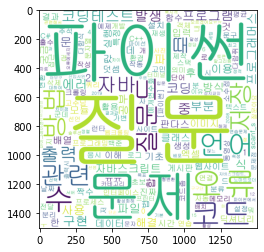

In [13]:
# WordCloud를 이용해 텍스트 구름을 만들어봅시다.

wordcloud = WordCloud(
    font_path = "C:/Windows/Fonts/NGULIM.ttf",
    background_color = "white",
    height = 1500,
    width = 1500
)

img = wordcloud.generate_from_frequencies(counter)
plt.imshow(img)